In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:

sea.set(style="whitegrid", font_scale=1.75)

ts = pd.read_csv('test.csv')
tr = pd.read_csv('train.csv')

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

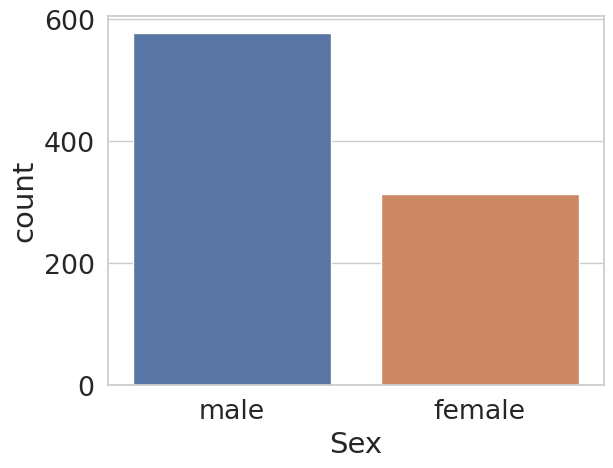

In [ ]:
sea.countplot(data = tr,x='Sex')

Através da estrutura apresentada a cima é possível constatar que maior parte entre os mortos foram do sexo masculino.

<Axes: xlabel='Age', ylabel='Count'>

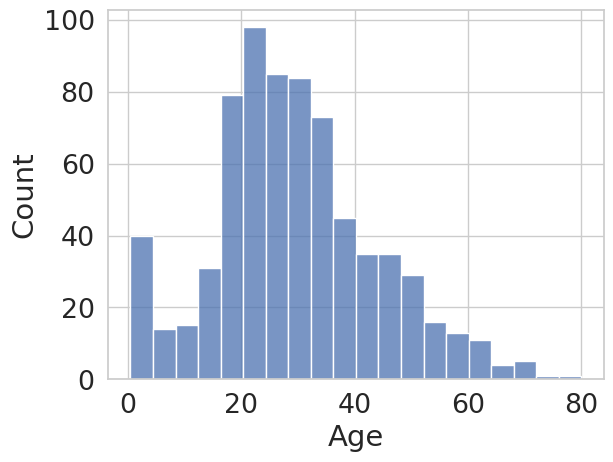

In [ ]:
sea.histplot(data = tr,x='Age')

Através da estrutura apresentada a cima é possível constatar que a idade média entre o maior número de pessoas estão aproximadamente entre 20 e 40 anos de idade.

In [ ]:
tr['Classe'] = ''
tr.loc[tr['Pclass']== 1,'Classe'] = 'Primeira'
tr.loc[tr['Pclass']== 2,'Classe'] = 'Segunda'
tr.loc[tr['Pclass']== 3,'Classe'] = 'Terceira'

<Axes: xlabel='Classe', ylabel='count'>

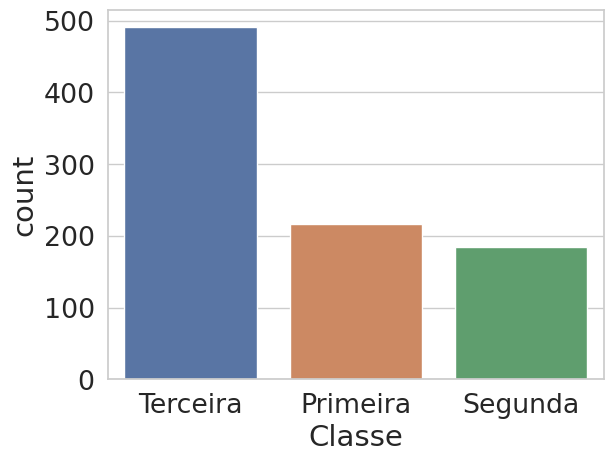

In [ ]:
sea.countplot(data = tr, x = 'Classe')

Através da estrutura apresentada a cima é possível constatar que grande parte dos mortos foram da terceira classe

<Axes: xlabel='Survived', ylabel='count'>

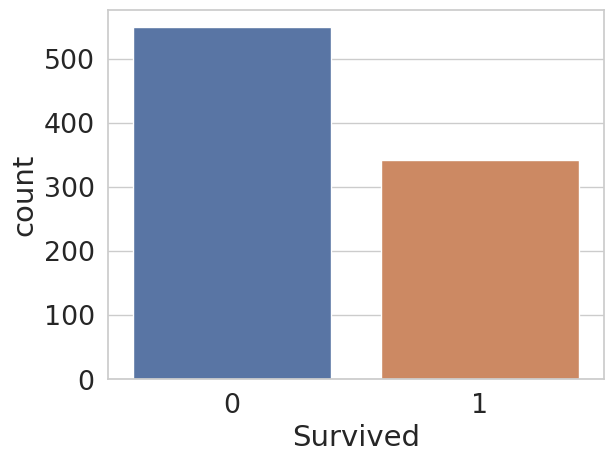

In [ ]:
sea.countplot(data = tr,x='Survived')

In [ ]:
sobreviveram = tr.loc[tr['Survived']== 1]
mortos = tr.loc[tr['Survived']== 0]

Nesta estrutura analisa as pessoas que sobreviveram e os que morreram

<Axes: xlabel='Age', ylabel='Count'>

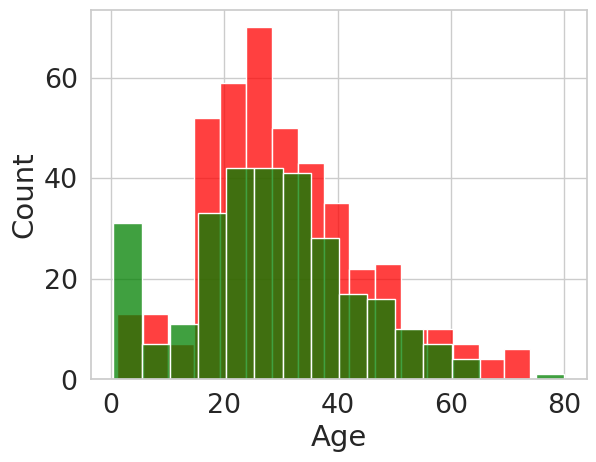

In [ ]:
sea.histplot(data = mortos, x = 'Age',color='red')
sea.histplot(data = sobreviveram, x = 'Age', color='green')

<Axes: xlabel='Sex', ylabel='Count'>

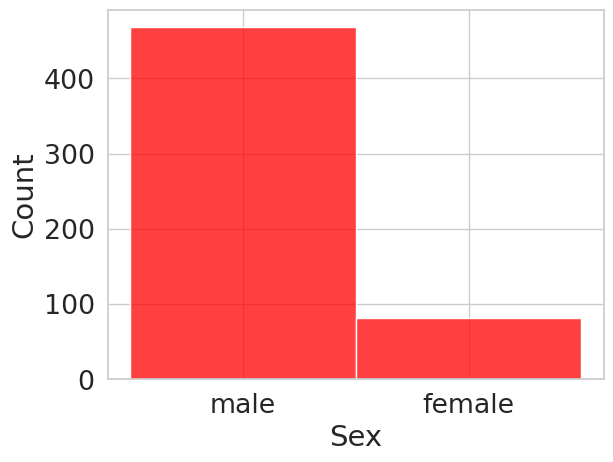

In [ ]:
sea.histplot(data = mortos, x = 'Sex',color='red')

<Axes: xlabel='Classe', ylabel='Count'>

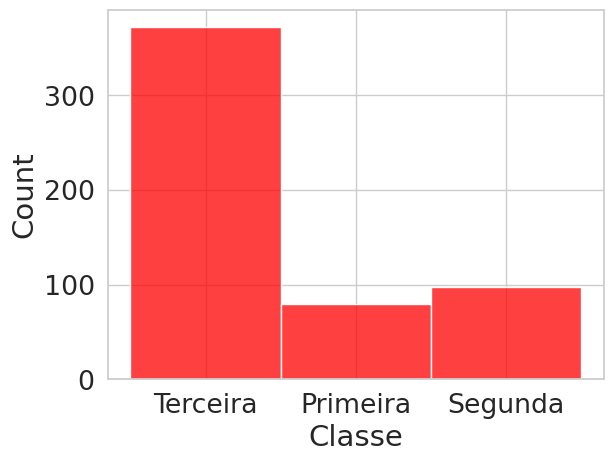

In [ ]:
sea.histplot(data = mortos, x = 'Classe',color='red')

<Axes: xlabel='Classe', ylabel='count'>

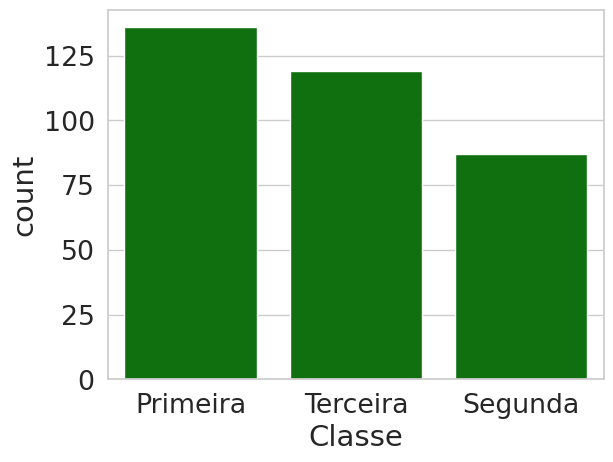

In [ ]:
sea.countplot(data = sobreviveram, x = 'Classe', color='green')

<Axes: xlabel='Sex', ylabel='Count'>

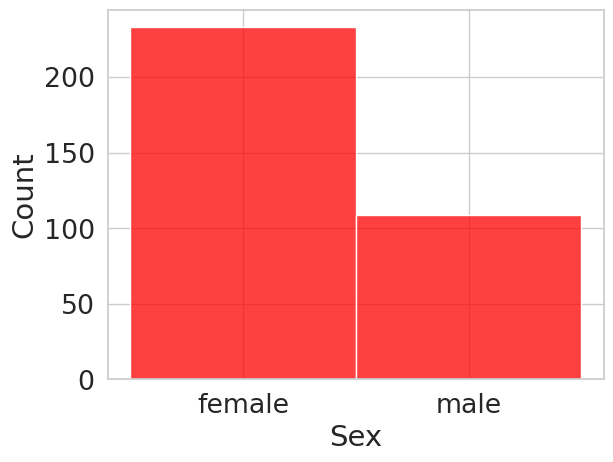

In [ ]:
sea.histplot(data = sobreviveram, x = 'Sex', color='red')

<Axes: xlabel='Classe', ylabel='Count'>

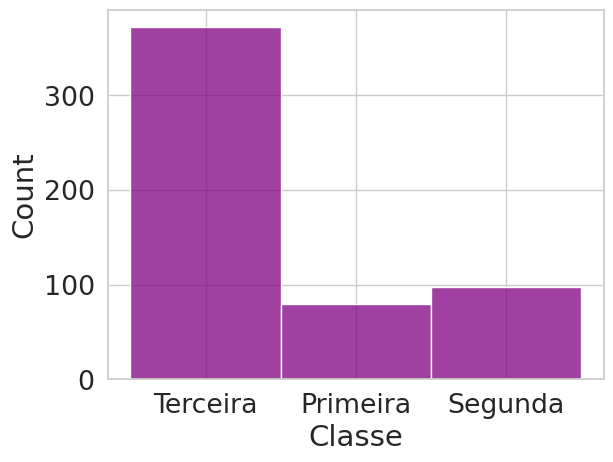

In [ ]:
sea.histplot(data = mortos, x = 'Classe',color='purple')

In [ ]:
mortos['Age'].mean()

30.62617924528302

In [ ]:
sobreviveram['Age'].mean()

28.343689655172415

A cima foi apresentado a média de idade entre mortos e sobreviventes

In [ ]:
tr['Fare'].std()

49.6934285971809

Dados acima apresentados através do arquivo treino.

In [ ]:
amostra_primeira = tr[tr['Classe']  == 'Primeira'].sample(n=50,random_state=42,replace=False)
amostra_segunda = tr[tr['Classe']  == 'Segunda'].sample(n=50,random_state=42,replace=False)
amostra_terceira = tr[tr['Classe']  == 'Terceira'].sample(n=50,random_state=42,replace=False)
amostra_representativa = pd.concat([amostra_primeira, amostra_segunda, amostra_terceira])
amostra_representativa.value_counts('Classe')
amostra_representativa = amostra_representativa.loc[amostra_representativa['Survived'] == 1]

<Axes: xlabel='Classe', ylabel='count'>

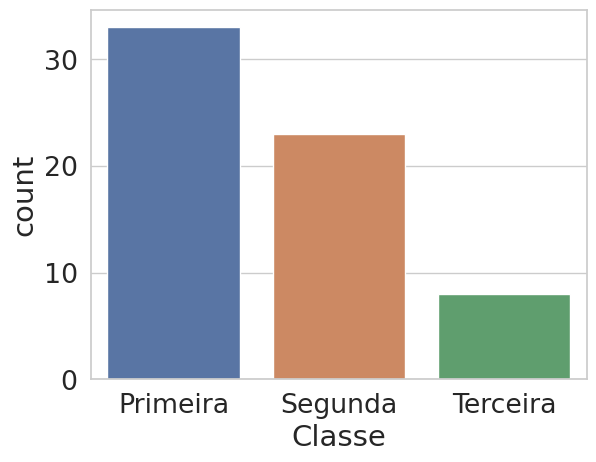

In [ ]:
sea.countplot(data = amostra_representativa, x = 'Classe')

Abaixo segue relação de sobreviventes de acordo com cada classe

In [ ]:
sobrevivente_primeira_classe = len(sobreviveram[sobreviveram['Classe'] == 'Primeira'])

In [ ]:
(sobrevivente_primeira_classe *100 ) / len(sobreviveram)

39.76608187134503

In [ ]:
sobrevivente_segunda_classe = len(sobreviveram[sobreviveram['Classe'] == 'Segunda'])

In [ ]:
(sobrevivente_segunda_classe *100 ) / len(sobreviveram)

25.43859649122807

In [ ]:
sobrevivente_terceira_classe = len(sobreviveram[sobreviveram['Classe'] == 'Terceira'])

In [ ]:
(sobrevivente_terceira_classe *100 ) / len(sobreviveram)

34.7953216374269

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
eixo_X = tr[['Classe','Survived']]
eixo_y = tr['Survived']

In [ ]:
amostra, __, y_train, y_test = train_test_split(
    eixo_X,
    eixo_y,
    test_size=0.7,
    stratify=tr['Classe'],
    random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

<ipython-input-60-efad9440e9fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(tr.corr(), annot=True)


<Axes: >

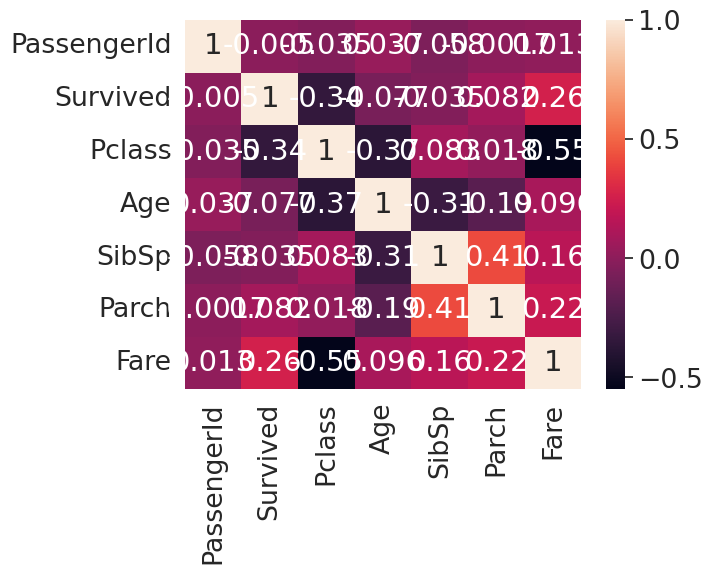

In [ ]:
sea.heatmap(tr.corr(), annot=True)

<Axes: xlabel='Parch', ylabel='SibSp'>

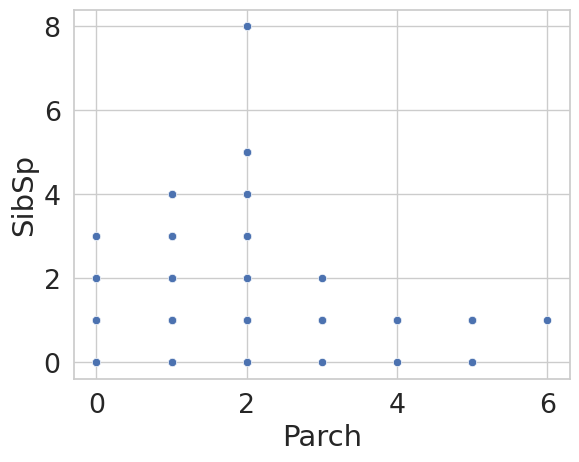

In [ ]:
sea.scatterplot(tr, x='Parch', y='SibSp')

In [ ]:
tr = tr.dropna()

In [ ]:
X = tr.drop('Survived',axis=1)
y = tr['Survived']

X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [ ]:
teste = DecisionTreeClassifier()

In [ ]:
teste.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = teste.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7837837837837838

In [ ]:
result = pd.DataFrame()

result['Passageiro'] = X_test['PassengerId']
result['Sobreviveu'] = y_pred

result

,Passageiro,Sobreviveu
118,119,0
251,252,1
742,743,1
544,545,0
712,713,1
96,97,0
139,140,0
337,338,1
577,578,1
492,493,1


In [ ]:
teste.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
teste = RandomForestClassifier()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=3, min_samples_split=2)

In [ ]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred2 = modelo.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.8108108108108109

In [ ]:
espace_amostral = len(tr)
espace_amostral

183

In [ ]:
filtro1 = sobreviveram.loc[sobreviveram['Sex']=='male']
evento = len(filtro1)
evento

109

In [ ]:
probabilidadex1 = evento / espace_amostral
probabilidadex1

0.5956284153005464

In [ ]:
filtro2 = sobreviveram.loc[sobreviveram['Sex']=='female']
eventx2 = len(filtro2)
eventx2

233

In [ ]:
probabilidade2 = evento / espace_amostral
probabilidade2

0.5956284153005464

Através das contastações deste trabalho, foi possível observar que hoveram priridades entre mulheres

Classes socais também tiveram priridades

Foi dado prioridade também para menores de idades